# Chapter 03 - Classification

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

MNIST is a dataset containing 70,000 handwritten digits with their respective labels.

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [6]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
print("The X shape is: {}".format(X.shape))
print("The y shape is: {}".format(y.shape))

The X shape is: (70000, 784)
The y shape is: (70000,)


The images contain 784 features, due to having a dimension of 28 × 28 pixels, where each pixel can have a value between 0 (white) and 255 (black). To view these images, we need to resize them to a dimension of 28×28, and use the `imshow()` function:

The correspondent label of this digit is 5


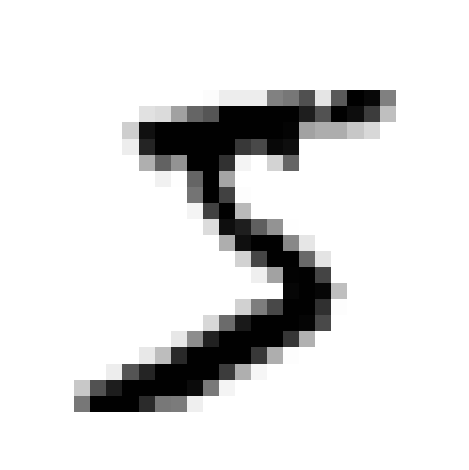

In [10]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
print("The correspondent label of this digit is {}".format(y[0]))
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

A way to visualize multiple images of digits in a 10×10 dimension:

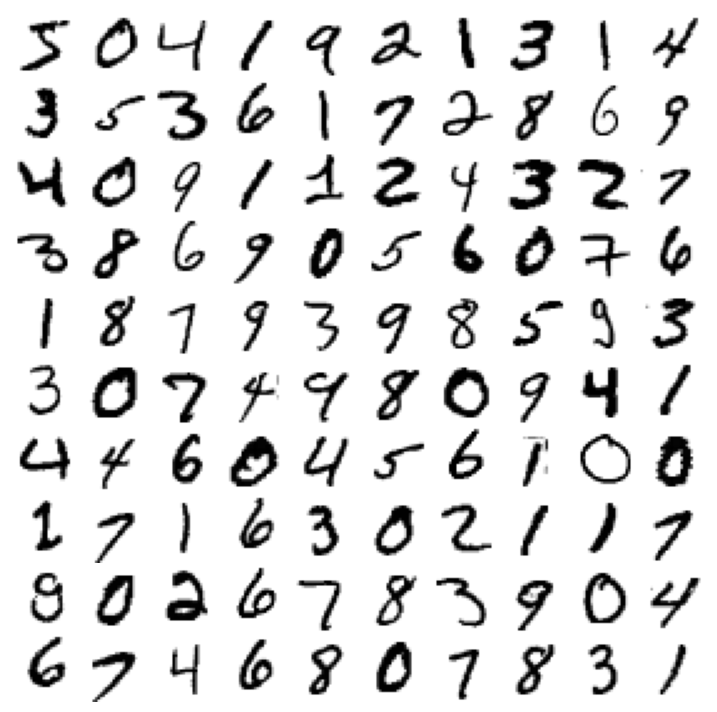

In [12]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

So, it is necessary to separate into training and testing sets. In this data set, the values ​​are already shuffled.

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#  Training a Binary Classifier

A binary classifier, in essence, distinguishes whether it is a value or not a value. Using as an example the construction of a binary classifier for the digit 5, or "5-Detector":

In [17]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

A good starting choice for a classifier is to use a _Stochastic Gradient Descent_ Classifier, or SGD via the `SGDClassifier` class. This handles instances one at a time independently. We can see that the prediction was made correctly, getting the number 5 right:

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


some_digit = X[0] # The label is 5

sgd_clf.predict([some_digit]) 

array([ True])

# Performance Measurement

## Measuring Accuracy Using Cross-Validation


One way to evaluate this is to use _Cross-Validation_, as presented in Chapter 2. In this case, we will use a k-fold of 3 folds (Remember that this operates as dividing the training set into k folds, training the model k times and each time using a fold to be the validation set). Using the code below we can achieve around 95% accuracy.

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

The result is not as good as it seems. One way to check this is with the _Dummy Classifier_, which operates only by classifying images as the most common class, which in this case is negative. We see a very close accuracy, given that having 10 well-distributed digits, about 10% are 5.

In [25]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

False


array([0.90965, 0.90965, 0.90965])

## Confusion Matrices

A _Confusion Matrix_ elucidates how many values were computed correctly and how many were computed falsely, assigning values of True Positives, False Positives (negative values identified as positive, or _Type I Error_), False Negatives (positive values identified as negative, or _Type II Error_) and True Negatives.

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In confusion matrices, the main diagonals represent the true values. In the case of the matrix above, the first row, we have respectively the value _True False_ (_TF_) on the left and _False Positive_ (_FP_) on the right. In the second row, on the left we have the value _False Negative_ (_FN_) and on the right the _True Positive_ (_TP_). A perfect matrix has only its main diagonal with values other than zero.

<div class="block-language-tx"><table>
<thead>
	<tr>
		<th style="text-align:center" colspan="2">Confusion Matrix</th>
	</tr>
</thead>
	
<tbody>
	<tr>
		<td>
			<b>True Negative</b>
		</td>
		<td>
			<b>False Positive</b>
		</td>	
	</tr>
</tbody>

<tbody>
	<tr>
		<td>
			<b>False Negative</b>
		</td>
		<td>
			<b>True Positive</b>
		</td>
	</tr>
</tbody>

</table>
</div>


In [31]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

Some important information coming from the confusion matrix are:


- **Precision** more important: In the case of detecting safe videos for children, it is preferable to reject videos that are safe (Low Recall), but keep the safe videos (High Precision).

  
$$
Precison = \frac{TP}{TP + FP}
$$


      
- **Recall** more important: When training something to detect shoplifters, it is preferable to have a higher false alarm rate (Low Precision), but to detect almost all cases where a shoplifting occurred (High Recall).

$$
Recall = \frac{TP}{TP + FN}
$$

## Precision and Recall

In [34]:
from sklearn.metrics import precision_score, recall_score

prec = precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)
rec = recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)


print("The precision value is: {}%. That means that all of claims of find the number 5, only {}% is correct.".format(round(prec*100,2),round(prec*100,2)))
print("The recall value is: {}%. That means that only {}% of the 5s are detected.".format(round(rec*100,2),round(rec*100,2)))

The precision value is: 83.71%. That means that all of claims of find the number 5, only 83.71% is correct.
The recall value is: 65.12%. That means that only 65.12% of the 5s are detected.


A useful metric that combines _Precision_ and _Recall_ is the _$F_{1}$ Score_, where a harmonic average of the results is made prioritizing smaller values, giving importance to both _Precision_ and _Recall_ values. It is worth noting that this is useful in moments where **both Recall and Precision are equally important**.

$$
  F_{1} = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} = 2 \times \frac{Precision \times Recall}{Precision + Recall} = \frac{TP}{TP + \frac{FN + FP}{2}}
$$

In [37]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

## The Precision/Recall Trade-off

Precision/Recall Trade-off consists of the possible choice of sacrificing _Precision_ in order to obtain more _Recall_ and vice versa. It operates through a _Decision Function_ for a selected instance when compared with the _Treshold_, when it is greater than this it is classified as positive, and when it is smaller as negative.

- **Increasing** the _Treshold_ **Increases the Precision** and **Decreases the Recall**.
- **Decreasing** the _Treshold_ **Increases the Recall** and **Decreases the Precision**.

It is not possible to change the _Threshold_ through functions, but it is possible to see it through the `decision_function` method and change the minimum/maximum score:

In [42]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [43]:
threshold_1 = 0
y_some_digit_pred_1 = (y_scores > threshold_1)
print(y_some_digit_pred_1)

threshold_2 = 3000
y_some_digit_pred_2 = (y_scores > threshold_2)
print(y_some_digit_pred_2)

[ True]
[False]


It is possible to observe that when we increase the _Threshold_, we reduce the _Recall_.

In [45]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

print("Precision: {}".format(precisions))
print("Recall: {}".format(recalls))
print("Threshold: {}".format(thresholds))

Precision: [0.09035    0.09035151 0.09035301 ... 1.         1.         1.        ]
Recall: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
Threshold: [-146348.56726174 -142300.00705404 -137588.97581744 ...   38871.26391927
   42216.05562787   49441.43765905]


You can view _Precision_ and _Recall_ using the scores for each _Threshold_:

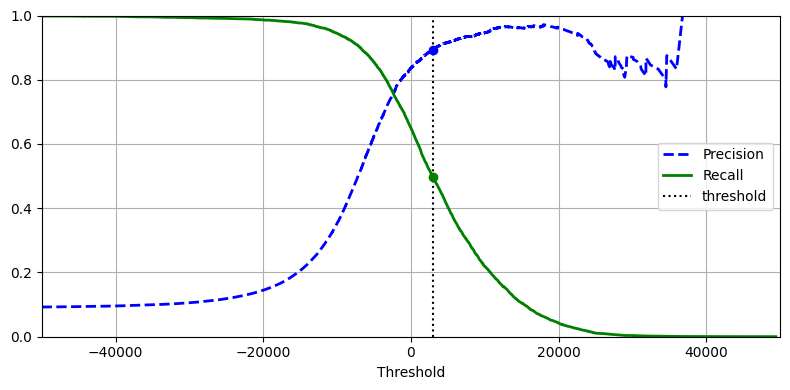

Precision with threshold >= 3000: 0.8911317008603574
Recall with threshold >= 3000: 0.4967718133185759


In [47]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold_2, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold_2).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo") # blue dot
plt.plot(thresholds[idx], recalls[idx], "go") # green dot
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()


print("Precision with threshold >= {}: {}".format(threshold_2, precisions[idx]))
print("Recall with threshold >= {}: {}".format(threshold_2, recalls[idx]))

Another way to observe the behavior of _Thershold_ is from the _Precision_ × _Recall_ curves:

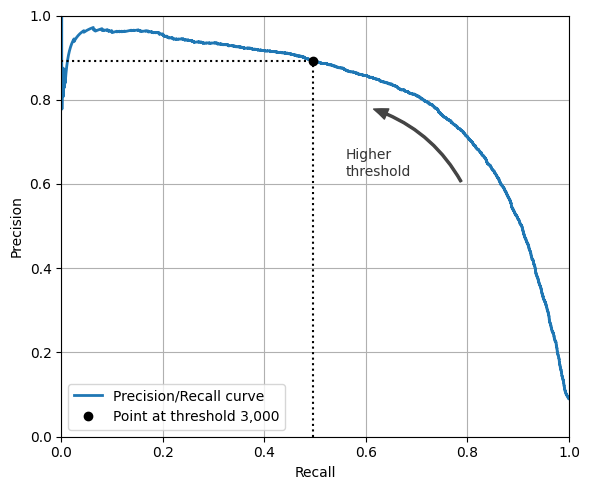

In [49]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:") # vertical dotted line
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:") # horizontal dotted line
plt.plot([recalls[idx]], [precisions[idx]], "ko", label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch((0.79, 0.60), (0.61, 0.78), connectionstyle="arc3,rad=.2", 
                                            arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10", color="#444444")) # print arrow
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333") # Print text in graph
plt.xlabel("Recall") # x Label
plt.ylabel("Precision") # y Label
plt.axis([0, 1, 0, 1]) # Axis limits
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

An alternative way to define a _Precision_ or _Recall_ is using the `argmax()` method:

In [51]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]

y_train_pred_90 = (y_scores >= threshold_for_90_precision)

precision_at_90_precision = precision_score(y_train_5, y_train_pred_90)
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)

print("Values at 90 Precision:")
print("Precision: {}".format(precision_at_90_precision))
print("Recall: {}".format(recall_at_90_precision))
print("Threshold: {}".format(threshold_for_90_precision))

Values at 90 Precision:
Precision: 0.9000345901072293
Recall: 0.4799852425751706
Threshold: 3370.0194991439557


## The ROC Curve

_Receiver Operating Characteristic_ (ROC) curve plot the _True Positive Rate_ (TPR, _Sensitivity_ or _Recall_) × _False Positive Rate_ (FPR, or _Fallout_).

The FPR can be read also like the _Ratio of negative instances that are incorrectly classified as positive_. Can be also written as $FPR = 1 - TNR$, that is the _True Negative Ratio_, or _Specificity_. 

So, the ROC curve is _Sensitivity_ × (1 - _Specificity_).

In [54]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Below is a graph of the ROC curve with 90% accuracy as the parameter. Is important to observe the dotted line, reprenting the behavior of a ROC Curve of a Random Classifier. A good Classifier must be as far from that line as possible.

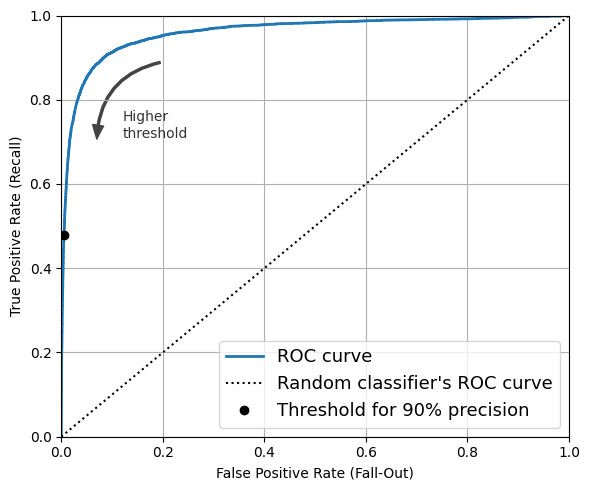

In [56]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

# ROC Curve
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch((0.20, 0.89), (0.07, 0.70), connectionstyle="arc3,rad=.4",
                                            arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10", color="#444444")) # arrow
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333") # text
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

For this curve theres another trade-off: **↑ TPR, ↓ FPR**.


<div class="alert alert-block alert-info">
<b>Note: How to know when use Precision × Recall (PR) or ROC Curve?</b>


 Use the PR curve when: Positive class is rare, OR when you care about False Positives more than False Negatives.

 In other cases, use ROC.
</div>

In [59]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

To make a comparison with the `SGDClassifier` classifier, a `RandomForestClassifier` will also be tested.

In [61]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

<div class="alert alert-block alert-warning">
<b>Caution:</b>
To use `precision_recall_curve()` it is necessary to have both _labels_ and _scores_ assigned to each instance. The `RandomForestClassifier` algorithm does not have the `decision_function()` method, but the problem can be worked around by using the `predict_proba()` method, which returns the probability of each instance belonging to a class.
</div>

In [63]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

The first column shows the negative probabilities, and the second column corresponds to the positive probability. It is important to note that these are the **estimated** probabilities.

In [65]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

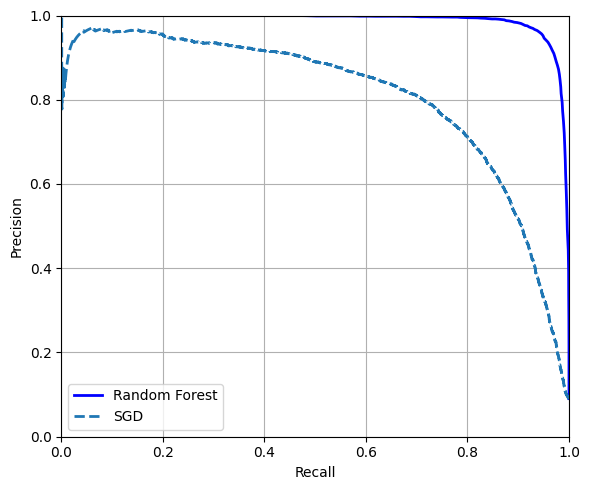

In [66]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

The behavior of the graphs shows the better performance of `RandomForestClassifier` in relation to `SGDClassifier`.

In [68]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%

rfc_f1 = f1_score(y_train_5, y_train_pred_forest)
rfc_roc = roc_auc_score(y_train_5, y_scores_forest)
rfc_precision = precision_score(y_train_5, y_train_pred_forest)
rfc_recall = recall_score(y_train_5, y_train_pred_forest)

print("F1 Score: {}%".format((round(rfc_f1,4))*100))
print("ROC Score: {}%".format((round(rfc_roc,4))*100))
print("Precision: {}%".format((round(rfc_precision,4))*100))
print("Recall: {}%".format((round(rfc_recall,4))*100))

F1 Score: 92.75%
ROC Score: 99.83%
Precision: 98.97%
Recall: 87.25%


#  Multiclass Classification

_Multiclass Classifier_ can distinguish more than two classes. Two main ways are:

- _One-Versus-the-Rest_ (OvR) or _One-Versus-All_ (OvA): Trains a binary classifier for each class. In case we have 10 classes, we will have 10 binary classifiers. The correct class is decided as the one with the highest score;

- _One-versus-One_ (OvO): Trains a binary classifier for each pair of digits.

Below, an _SVC_ algorithm will be trained for the first 2000 images, where the OvO strategy is automatically selected:

In [71]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5

SVC(random_state=42)

It is possible to see that the prediction made for the digit "5" is correct, thus having the highest Score:

In [73]:
svm_clf.predict([some_digit]) # some_digit = X[0] = "5"

some_digit_scores = svm_clf.decision_function([some_digit])
class_id = some_digit_scores.argmax() # select the highest score

print("The scores are: {}".format(some_digit_scores.round(2)))
print("The class id is: {}".format(class_id))

The scores are: [[ 3.79  0.73  6.06  8.3  -0.29  9.3   1.75  2.77  7.21  4.82]]
The class id is: 5


The `class_` attribute show the labels:

In [75]:
print(svm_clf.classes_)
svm_clf.classes_[class_id]

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


'5'

It is possible to force the code to use the strategy as OvO or OvR. The code below consists of an SVC-based OvR:

In [77]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [78]:
# prediction, and number of trained classifiers:
print(ovr_clf.predict([some_digit]))
len(ovr_clf.estimators_)

['5']


10

It is also possible to use SGD to make the classifications:

In [80]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [81]:
print(sgd_clf.decision_function([some_digit]).round())

[[-31893. -34420.  -9531.   1824. -22320.  -1386. -26189. -16148.  -4604.
  -12051.]]


It is not uncommon for errors to occur. It is possible to try to work around this through _Cross-Validation_

In [83]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Even if you managed to achieve scores above 85%, there are ways to improve the result. A simple way to improve performance is to do as in Chapter 2 and _Scaling_ the inputs:

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Error Analysis


It is possible to analyze the error through _Confusion Matrix_

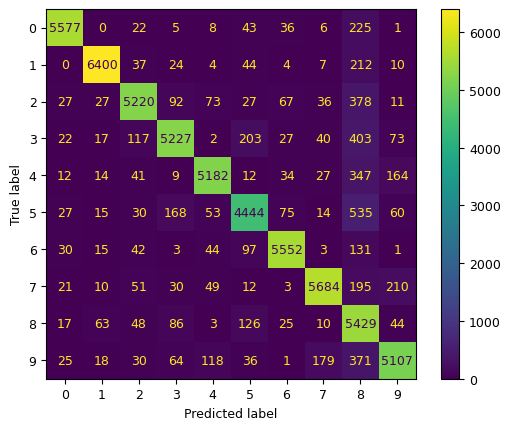

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

The above table shows absolute numbers that have been correctly classified (shown on the main diagonal) and classified as another number. Below we see another way to visualize this matrix using percentages:

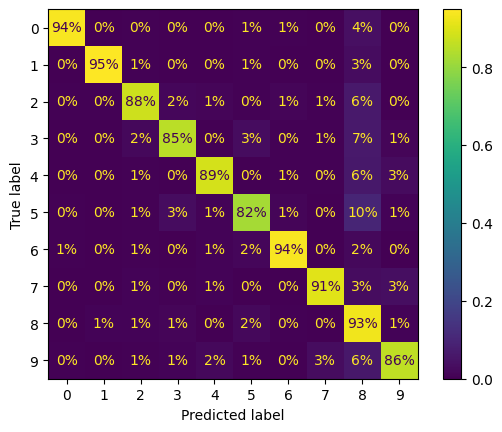

In [140]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In both matrices, we can see how many _Predicted Labels_ are incorrectly selected, getting confused with the digit "8". Using the _Confusion Matrix_ using **Error by Row**, we can see how much of each _True Label_ is confused with prediction errors:

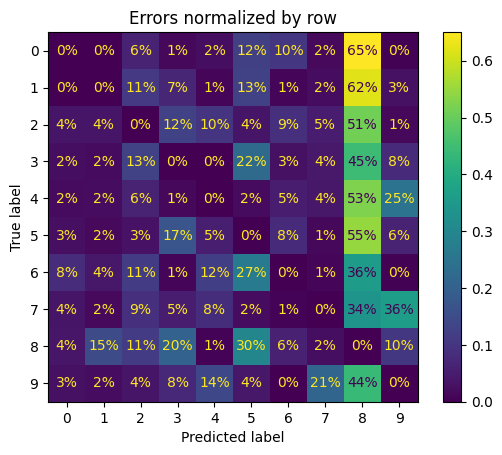

In [164]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight,  normalize="true", values_format=".0%")
plt.title("Errors normalized by row")

plt.show()

Similarly, we can see through the _Confusion Matrix_ by analyzing the **Error by Column** to see how much each digit was incorrectly classified in each prediction:

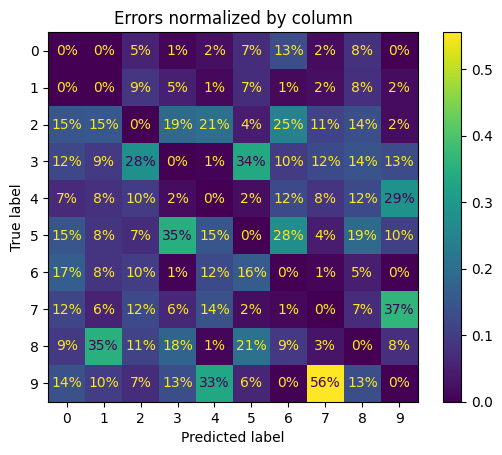

In [162]:
# sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
plt.title("Errors normalized by column")
plt.show()

# Multilabel Classification


The concept of _MultiLabel_ applies when it is possible to classify multiple characteristics or labels in the same instance.

Below we create a target that analyzes whether the number is greater than or equal to 7 and whether or not it is odd.

In [171]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7') # numbers greater than 7 or equal (7,8,9)
y_train_odd = (y_train.astype('int8') % 2 == 1) # odd numbers
y_multilabel = np.c_[y_train_large, y_train_odd] # translates slice objects to concatenation along the second axis

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [173]:
knn_clf.predict([some_digit]) # Some digit = "5"

array([[False,  True]])

One way to see how well the model performed is by using the _F1 Score_. It is worth noting that you can change the evaluation method to make it _Weighted_ or _Macro_:

- _Macro_: Considers that everything has an equal weight;
- _Weighted_: Considers some of the instances with more weight than others.

In [185]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

f1_knn_macro = f1_score(y_multilabel, y_train_knn_pred, average="macro")
f1_knn_weighted = f1_score(y_multilabel, y_train_knn_pred, average="weighted")

print("The F1 Score using Macro avarege is: {}".format(round(f1_knn_macro,5)))
print("The F1 Score using Weighted avarege is: {}".format(round(f1_knn_weighted,5)))

The F1 Score using Macro avarege is: 0.97641
The F1 Score using Weighted avarege is: 0.97784


Sometimes, there are dependencies between _labels_. An example of this is that, in the two _labels_ that we have, `large` implies that there is a greater probability of the number being odd than even (7,8,9), and the `odd` classifier does not capture this. In these cases, it is possible to perform a **Chain** classification, where, in addition to the dependency of the _inputs_, previous predictions are used.

It is possible to use the `ChainClassifier` for this.

In [193]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [195]:
chain_clf.predict([some_digit])

array([[0., 1.]])

# Multioutput Classification


_Multioutput Classification_ operates similarly to _Multilabel_, however, each label can have more than two possible values (Multiclass).

To demonstrate this, a system will be made that removes _noise_ from images. The classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255).

First, we need to create noise in the images:

In [199]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Below we see a comparison between the training set image with _noise_ and the target image

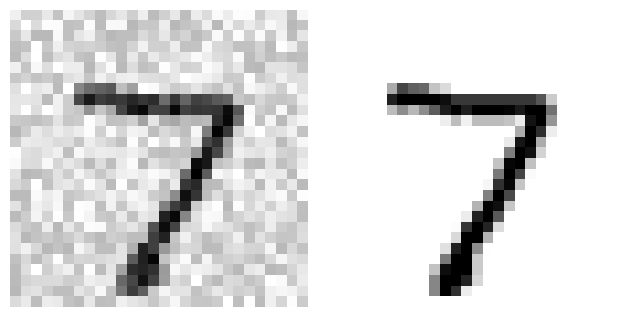

In [205]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
save_fig("noisy_digit_example_plot")
plt.show()

Below we see the result of the classifier:

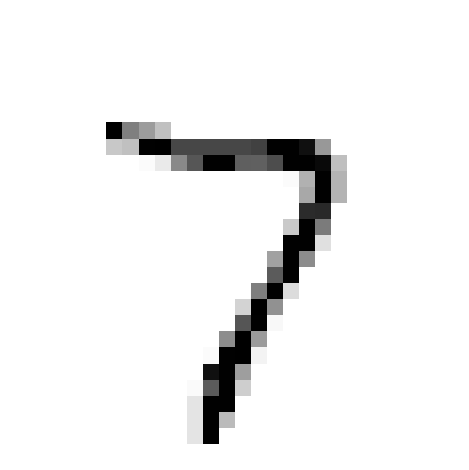

In [203]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")  # extra code – saves Figure 3–13
plt.show()